# 1. Setup and Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load Institution Dataset

## 2.1 Load Full Dataset

In [72]:
file_path = "/Users/andywu155/Desktop/data/Most-Recent-Cohorts-Institution.csv"
df = pd.read_csv(file_path, dtype=str, low_memory=False)
print(df.shape)
print(df.columns)
print(df.head())

(6429, 3306)
Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'COUNT_WNE_MALE1_P11', 'GT_THRESHOLD_P11', 'MD_EARN_WNE_INC1_P11',
       'MD_EARN_WNE_INC2_P11', 'MD_EARN_WNE_INC3_P11',
       'MD_EARN_WNE_INDEP0_P11', 'MD_EARN_WNE_INDEP1_P11',
       'MD_EARN_WNE_MALE0_P11', 'MD_EARN_WNE_MALE1_P11', 'SCORECARD_SECTOR'],
      dtype='object', length=3306)
   UNITID     OPEID  OPEID6                               INSTNM        CITY  \
0  100654  00100200  001002             Alabama A & M University      Normal   
1  100663  00105200  001052  University of Alabama at Birmingham  Birmingham   
2  100690  02503400  025034                   Amridge University  Montgomery   
3  100706  00105500  001055  University of Alabama in Huntsville  Huntsville   
4  100724  00100500  001005             Alabama State University  Montgomery   

  STABBR         ZIP                                       ACCREDAGENCY  \
0   

## 2.2 Select Relevant Columns for Analysis

In [73]:
cols = [
    "UNITID","INSTNM","CONTROL","CITY","STABBR","ADM_RATE",
    "TUITIONFEE_IN","TUITIONFEE_OUT","MD_EARN_WNE_P10",
    "MD_EARN_WNE_INC1_P11","MD_EARN_WNE_INC2_P11","MD_EARN_WNE_INC3_P11",
    "MD_EARN_WNE_INDEP0_P11","MD_EARN_WNE_INDEP1_P11",
    "MD_EARN_WNE_MALE0_P11","MD_EARN_WNE_MALE1_P11"
]

df = pd.read_csv(file_path, usecols=cols, low_memory=False)
df

,UNITID,INSTNM,CITY,STABBR,CONTROL,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
0,100654,Alabama A & M University,Normal,AL,1,0.6622,10024.0,18634.0,40628.0,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,0.8842,8832.0,21864.0,54501.0,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0
2,100690,Amridge University,Montgomery,AL,2,NaN,NaN,NaN,37621.0,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,0.7425,11770.0,24662.0,61767.0,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0
4,100724,Alabama State University,Montgomery,AL,1,0.9564,11248.0,19576.0,34502.0,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,49382201,College Unbound - Newport/Aquidneck Island,Newport,RI,2,NaN,10488.0,10488.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6425,49425001,Valley College - Fairlawn - School of Nursing,Fairlawn,OH,3,NaN,NaN,NaN,24900.0,26087.0,37545.0,NaN,NaN,28205.0,27499.0,NaN
6426,49501301,Western Maricopa Education Center - Southwest ...,Buckeye,AZ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6427,49501302,Western Maricopa Education Center - Northeast ...,Phoenix,AZ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Clean and Prepare Earnings Data

In [ ]:
file_path = "/Users/andywu155/Desktop/data/Most-Recent-Cohorts-Institution.csv"
cols = [
    "UNITID","INSTNM","CONTROL","CITY","STABBR","ADM_RATE",
    "TUITIONFEE_IN","TUITIONFEE_OUT","MD_EARN_WNE_P10",
    "MD_EARN_WNE_INC1_P11","MD_EARN_WNE_INC2_P11","MD_EARN_WNE_INC3_P11",
    "MD_EARN_WNE_INDEP0_P11","MD_EARN_WNE_INDEP1_P11",
    "MD_EARN_WNE_MALE0_P11","MD_EARN_WNE_MALE1_P11"
]
df = pd.read_csv(file_path, usecols=cols, low_memory=False)
num_cols = [
    "ADM_RATE","TUITIONFEE_IN","TUITIONFEE_OUT","MD_EARN_WNE_P10",
    "MD_EARN_WNE_INC1_P11","MD_EARN_WNE_INC2_P11","MD_EARN_WNE_INC3_P11",
    "MD_EARN_WNE_INDEP0_P11","MD_EARN_WNE_INDEP1_P11",
    "MD_EARN_WNE_MALE0_P11","MD_EARN_WNE_MALE1_P11"
]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")
df = df.dropna(subset=["MD_EARN_WNE_P10"])
df

,UNITID,INSTNM,CITY,STABBR,CONTROL,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
0,100654,Alabama A & M University,Normal,AL,1,0.6622,10024.0,18634.0,40628.0,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,0.8842,8832.0,21864.0,54501.0,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0
2,100690,Amridge University,Montgomery,AL,2,NaN,NaN,NaN,37621.0,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,0.7425,11770.0,24662.0,61767.0,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0
4,100724,Alabama State University,Montgomery,AL,1,0.9564,11248.0,19576.0,34502.0,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6410,48511110,Georgia Military College - Stone Mountain,Stone Mountain,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0
6411,48511111,Georgia Military College - Fayetteville,Fayetteville,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0
6412,48511112,Georgia Military College - Dublin,Dublin,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0
6413,48511113,Georgia Military College - Rockdale,Conyers,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0


# 4. ROI Calculations

In [71]:
df["MD_EARN_WNE_P10"] = pd.to_numeric(df["MD_EARN_WNE_P10"], errors="coerce")
df["TUITIONFEE_IN"] = pd.to_numeric(df["TUITIONFEE_IN"], errors="coerce")
df["TUITIONFEE_OUT"] = pd.to_numeric(df["TUITIONFEE_OUT"], errors="coerce")
df["ROI_INSTATE"] = df["MD_EARN_WNE_P10"] / df["TUITIONFEE_IN"]
df["ROI_OUTSTATE"] = df["MD_EARN_WNE_P10"] / df["TUITIONFEE_OUT"]
df_roi = df.dropna(subset=["ROI_INSTATE", "ROI_OUTSTATE"])
df_roi

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,SCORECARD_SECTOR,ROI_INSTATE,ROI_OUTSTATE
0,100654,00100200,001002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,36650,41070,47016,38892,41738,38167.0,40250.0,4,4.053073,2.180316
1,100663,00105200,001052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,47182,51896,54368,50488,51505,46559.0,59181.0,4,6.170856,2.492728
3,100706,00105500,001055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,uah.clearcostcalculator.com/student/default/ne...,...,51208,62219,62577,55920,60221,47787.0,67454.0,4,5.247833,2.504541
4,100724,00100500,001005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,tcc.ruffalonl.com/Alabama State University/Fre...,...,32844,36932,37966,34294,31797,32303.0,36964.0,4,3.067390,1.762464
5,100751,00105100,001051,The University of Alabama,Tuscaloosa,AL,35487-0100,Southern Association of Colleges and Schools C...,www.ua.edu/,ua.aidcalc.cloud/netprice.htm,...,50774,54334,61271,56433,53535,49692.0,65820.0,4,4.976555,1.783765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6409,48511109,00157111,001571,Georgia Military College - Madison,Madison,GA,306501349,Southern Association of Colleges and Schools C...,https://www.gmc.edu/,NaN,...,34248,39265,45957,35461,37962,33638.0,42247.0,13,4.839374,4.839374
6410,48511110,00157112,001571,Georgia Military College - Stone Mountain,Stone Mountain,GA,300833070,NaN,https://www.gmc.edu/,NaN,...,34248,39265,45957,35461,37962,33638.0,42247.0,13,4.839374,4.839374
6411,48511111,00157113,001571,Georgia Military College - Fayetteville,Fayetteville,GA,302144280,NaN,https://www.gmc.edu/,NaN,...,34248,39265,45957,35461,37962,33638.0,42247.0,13,4.839374,4.839374
6412,48511112,00157114,001571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/,NaN,...,34248,39265,45957,35461,37962,33638.0,42247.0,13,4.839374,4.839374


# 5. STEM Tagging: Field-of-Study Data

In [ ]:
majors = pd.read_csv("/Users/andywu155/Desktop/data/Most-Recent-Cohorts-Field-of-Study.csv", low_memory=False)
stem = majors[majors["CIPDESC"].str.contains("Engineering|Computer|Math|Biolog", case=False, na=False)]
stem_schools = stem["UNITID"].unique()
df_roi = df_roi.copy()
df_roi.loc[:, "STEM_SCHOOL"] = df_roi["UNITID"].isin(stem_schools)
df_roi

,UNITID,INSTNM,CITY,STABBR,CONTROL,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,ROI_INSTATE,ROI_OUTSTATE,ROI_DIFF,STEM_SCHOOL
0,100654,Alabama A & M University,Normal,AL,1,0.6622,10024.0,18634.0,40628.0,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0,4.053073,2.180316,1.872757,True
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,0.8842,8832.0,21864.0,54501.0,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0,6.170856,2.492728,3.678128,True
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,0.7425,11770.0,24662.0,61767.0,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0,5.247833,2.504541,2.743292,True
4,100724,Alabama State University,Montgomery,AL,1,0.9564,11248.0,19576.0,34502.0,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0,3.067390,1.762464,1.304926,True
5,100751,The University of Alabama,Tuscaloosa,AL,1,0.7582,11900.0,33200.0,59221.0,50774.0,54334.0,61271.0,56433.0,53535.0,49692.0,65820.0,4.976555,1.783765,3.192790,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6409,48511109,Georgia Military College - Madison,Madison,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0,4.839374,4.839374,0.000000,False
6410,48511110,Georgia Military College - Stone Mountain,Stone Mountain,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0,4.839374,4.839374,0.000000,False
6411,48511111,Georgia Military College - Fayetteville,Fayetteville,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0,4.839374,4.839374,0.000000,False
6412,48511112,Georgia Military College - Dublin,Dublin,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0,4.839374,4.839374,0.000000,False


# 6. Visualizations

## 6.1 ROI Distribution

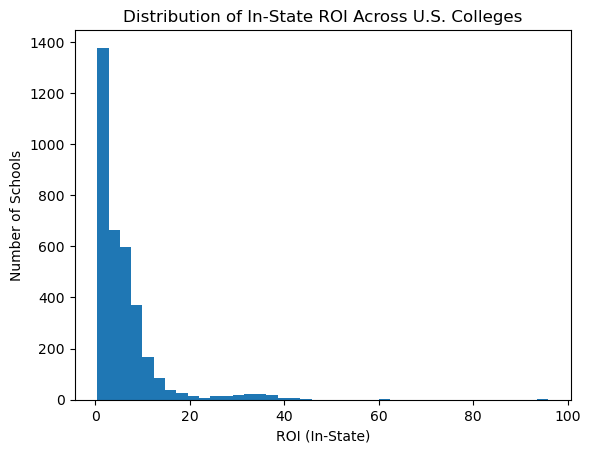

In [ ]:
plt.hist(df_roi["ROI_INSTATE"], bins=40)
plt.xlabel("ROI (In-State)")
plt.ylabel("Number of Schools")
plt.title("Distribution of In-State ROI Across U.S. Colleges")
plt.show()

## 6.2 Top 20 In-State ROI Schools

In [ ]:
top_roi = df_roi.sort_values("ROI_INSTATE", ascending=False).head(20)
top_roi[["INSTNM","STABBR","ROI_INSTATE","MD_EARN_WNE_P10","TUITIONFEE_IN"]]

,INSTNM,STABBR,ROI_INSTATE,MD_EARN_WNE_P10,TUITIONFEE_IN
2202,United States Merchant Marine Academy,NY,95.883598,90610.0,945.0
1118,Haskell Indian Nations University,KS,61.738333,37043.0,600.0
370,Ohlone College,CA,45.156406,54278.0,1202.0
3708,Las Positas College,CA,43.739726,51088.0,1168.0
358,Napa Valley College,CA,42.834775,49517.0,1156.0
305,Irvine Valley College,CA,42.522491,49156.0,1156.0
5961,IDEA at ATEP,CA,42.522491,49156.0,1156.0
4304,Tohono O'odham Community College,AZ,42.091202,39229.0,932.0
406,San Diego Miramar College,CA,41.933913,48224.0,1150.0
234,Chabot College,CA,41.863478,48143.0,1150.0


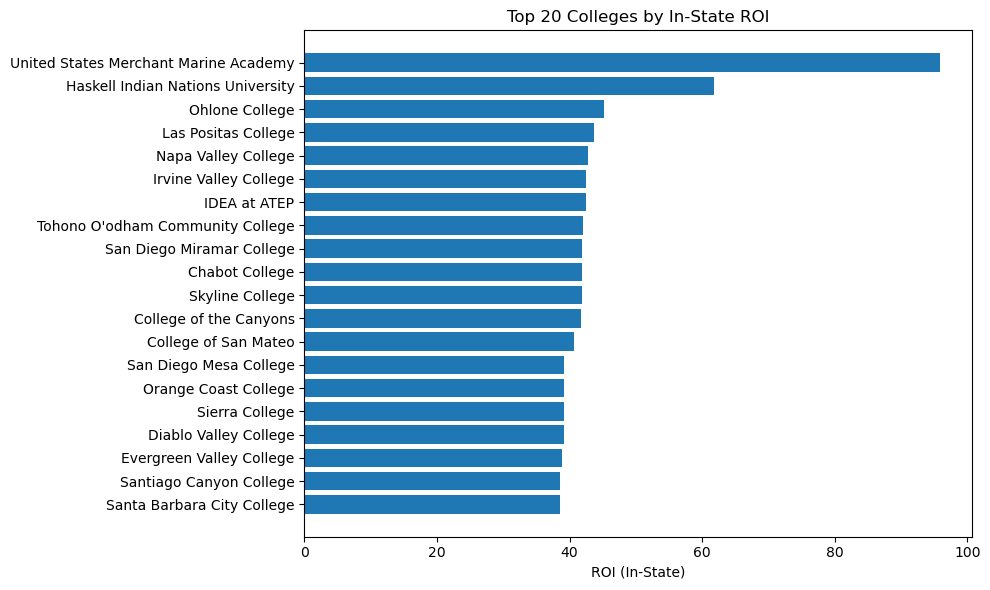

In [39]:
top20 = df_roi.sort_values("ROI_INSTATE", ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.barh(top20["INSTNM"], top20["ROI_INSTATE"])
plt.gca().invert_yaxis()
plt.xlabel("ROI (In-State)")
plt.title("Top 20 Colleges by In-State ROI")
plt.tight_layout()
plt.show()

## 6.3 Top 20 Out-of-State ROI Schools

In [ ]:
top20_out = df_roi.sort_values("ROI_OUTSTATE", ascending=False).head(20)
top20_out[["INSTNM","STABBR","ROI_OUTSTATE","MD_EARN_WNE_P10","TUITIONFEE_OUT"]]

,INSTNM,STABBR,ROI_OUTSTATE,MD_EARN_WNE_P10,TUITIONFEE_OUT
2202,United States Merchant Marine Academy,NY,95.883598,90610.0,945.0
1118,Haskell Indian Nations University,KS,61.738333,37043.0,600.0
4304,Tohono O'odham Community College,AZ,42.091202,39229.0,932.0
1950,Southwestern Indian Polytechnic Institute,NM,25.260274,27660.0,1095.0
6079,Mayo Clinic College of Medicine and Science - ...,AZ,24.455634,79652.0,3257.0
1588,Mayo Clinic College of Medicine and Science,MN,24.455634,79652.0,3257.0
6078,Mayo Clinic College of Medicine and Science - ...,FL,24.455634,79652.0,3257.0
6368,Keweenaw Bay Ojibwa Community College - Wabanu...,MI,22.912821,22340.0,975.0
6012,Triton College - Intl Union of Operating Engr ...,IL,20.864000,41728.0,2000.0
87,Dine College,AZ,20.700709,29188.0,1410.0


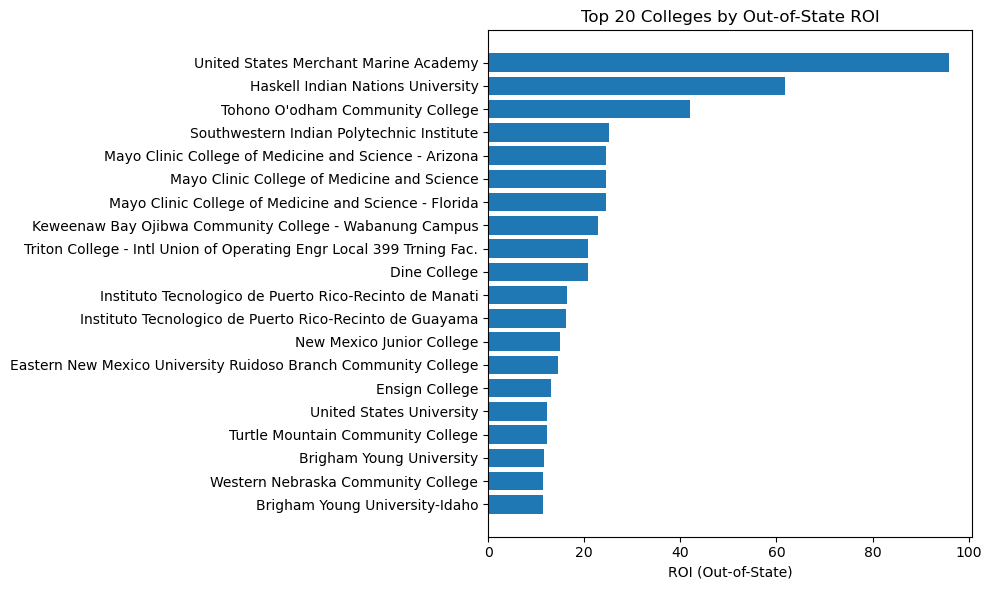

In [67]:
top20_out = df_roi.sort_values("ROI_OUTSTATE", ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.barh(top20_out["INSTNM"], top20_out["ROI_OUTSTATE"])
plt.gca().invert_yaxis()
plt.xlabel("ROI (Out-of-State)")
plt.title("Top 20 Colleges by Out-of-State ROI")
plt.tight_layout()
plt.show()

## 6.4 ROI by School Type (Control)

In [ ]:
df_roi = df_roi.copy()
df_roi["ROI_DIFF"] = df_roi["ROI_INSTATE"] - df_roi["ROI_OUTSTATE"]
df_roi

,UNITID,INSTNM,CITY,STABBR,CONTROL,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,ROI_INSTATE,ROI_OUTSTATE,ROI_DIFF,STEM_SCHOOL
0,100654,Alabama A & M University,Normal,AL,1,0.6622,10024.0,18634.0,40628.0,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0,4.053073,2.180316,1.872757,True
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,0.8842,8832.0,21864.0,54501.0,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0,6.170856,2.492728,3.678128,True
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,0.7425,11770.0,24662.0,61767.0,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0,5.247833,2.504541,2.743292,True
4,100724,Alabama State University,Montgomery,AL,1,0.9564,11248.0,19576.0,34502.0,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0,3.067390,1.762464,1.304926,True
5,100751,The University of Alabama,Tuscaloosa,AL,1,0.7582,11900.0,33200.0,59221.0,50774.0,54334.0,61271.0,56433.0,53535.0,49692.0,65820.0,4.976555,1.783765,3.192790,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6409,48511109,Georgia Military College - Madison,Madison,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0,4.839374,4.839374,0.000000,False
6410,48511110,Georgia Military College - Stone Mountain,Stone Mountain,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0,4.839374,4.839374,0.000000,False
6411,48511111,Georgia Military College - Fayetteville,Fayetteville,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0,4.839374,4.839374,0.000000,False
6412,48511112,Georgia Military College - Dublin,Dublin,GA,1,NaN,8112.0,8112.0,39257.0,34248.0,39265.0,45957.0,35461.0,37962.0,33638.0,42247.0,4.839374,4.839374,0.000000,False


In [43]:
df_roi.groupby("CONTROL")[["ROI_INSTATE","ROI_OUTSTATE"]].mean()

,ROI_INSTATE,ROI_OUTSTATE
CONTROL,,
1,10.023176,4.365475
2,2.214867,2.204511
3,2.657117,2.654541


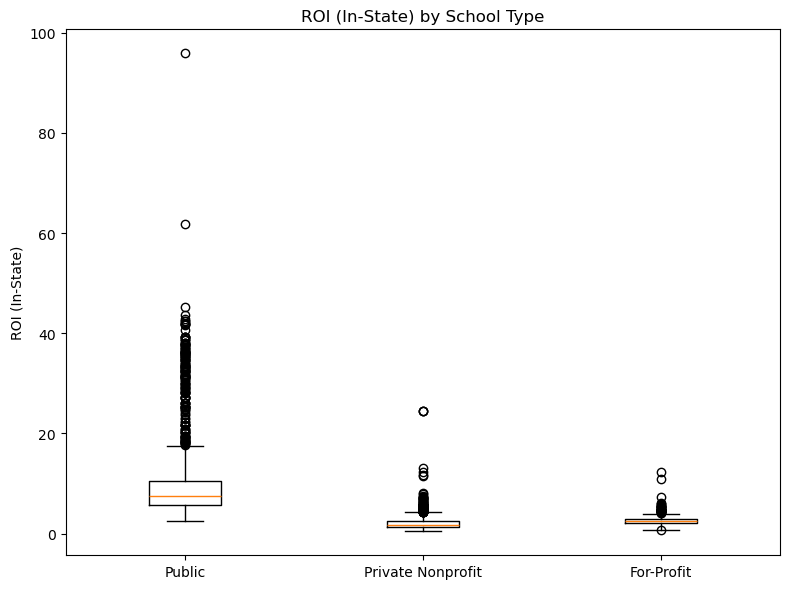

In [62]:
plt.figure(figsize=(8,6))
plt.boxplot([
    df_roi[df_roi["CONTROL"] == 1]["ROI_INSTATE"],
    df_roi[df_roi["CONTROL"] == 2]["ROI_INSTATE"],
    df_roi[df_roi["CONTROL"] == 3]["ROI_INSTATE"]
], tick_labels=["Public","Private Nonprofit","For-Profit"])
plt.ylabel("ROI (In-State)")
plt.title("ROI (In-State) by School Type")
plt.tight_layout()
plt.show()

## 6.5 Male vs Female Earnings Gap

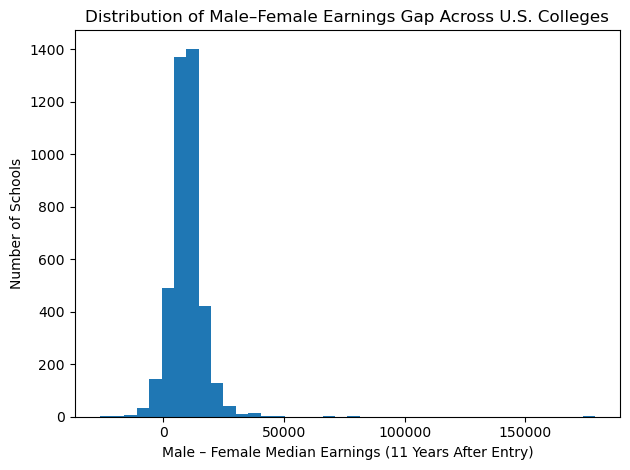

In [ ]:
df["MD_EARN_WNE_MALE0_P11"] = pd.to_numeric(df["MD_EARN_WNE_MALE0_P11"], errors="coerce")
df["MD_EARN_WNE_MALE1_P11"] = pd.to_numeric(df["MD_EARN_WNE_MALE1_P11"], errors="coerce")
df_gender = df.dropna(subset=["MD_EARN_WNE_MALE0_P11","MD_EARN_WNE_MALE1_P11"]).copy()
df_gender["GAP_MALE_FEMALE"] = df_gender["MD_EARN_WNE_MALE1_P11"] - df_gender["MD_EARN_WNE_MALE0_P11"]
plt.hist(df_gender["GAP_MALE_FEMALE"], bins=40)
plt.xlabel("Male – Female Median Earnings (11 Years After Entry)")
plt.ylabel("Number of Schools")
plt.title("Distribution of Male–Female Earnings Gap Across U.S. Colleges")
plt.tight_layout()
plt.show()

## 6.6 Family Income Group Earnings (INC1–INC3)

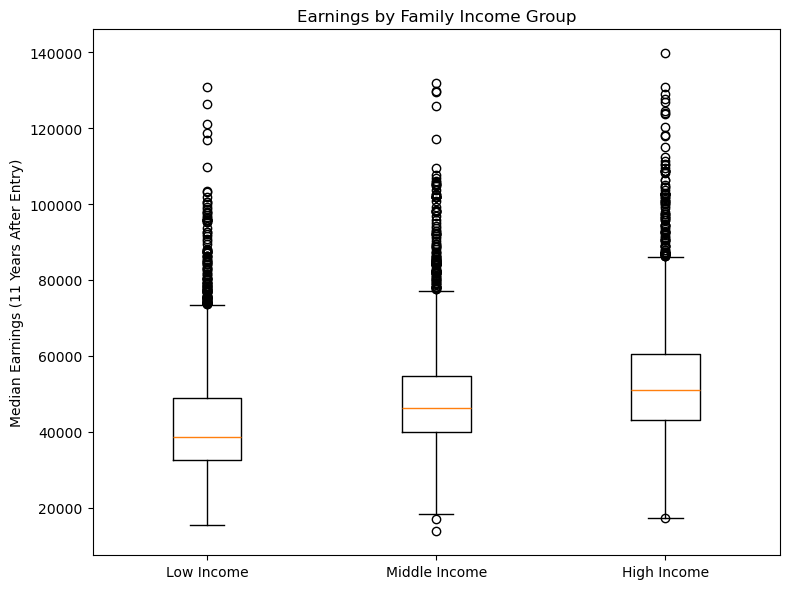

In [ ]:
df_inc = df.copy()
df_inc["MD_EARN_WNE_INC1_P11"] = pd.to_numeric(df_inc["MD_EARN_WNE_INC1_P11"], errors="coerce")
df_inc["MD_EARN_WNE_INC2_P11"] = pd.to_numeric(df_inc["MD_EARN_WNE_INC2_P11"], errors="coerce")
df_inc["MD_EARN_WNE_INC3_P11"] = pd.to_numeric(df_inc["MD_EARN_WNE_INC3_P11"], errors="coerce")
df_inc = df_inc.dropna(subset=["MD_EARN_WNE_INC1_P11","MD_EARN_WNE_INC2_P11","MD_EARN_WNE_INC3_P11"])
plt.figure(figsize=(8,6))
plt.boxplot([
    df_inc["MD_EARN_WNE_INC1_P11"],
    df_inc["MD_EARN_WNE_INC2_P11"],
    df_inc["MD_EARN_WNE_INC3_P11"]
], tick_labels=["Low Income","Middle Income","High Income"])
plt.ylabel("Median Earnings (11 Years After Entry)")
plt.title("Earnings by Family Income Group")
plt.tight_layout()
plt.show()

## 6.7 ROI by State

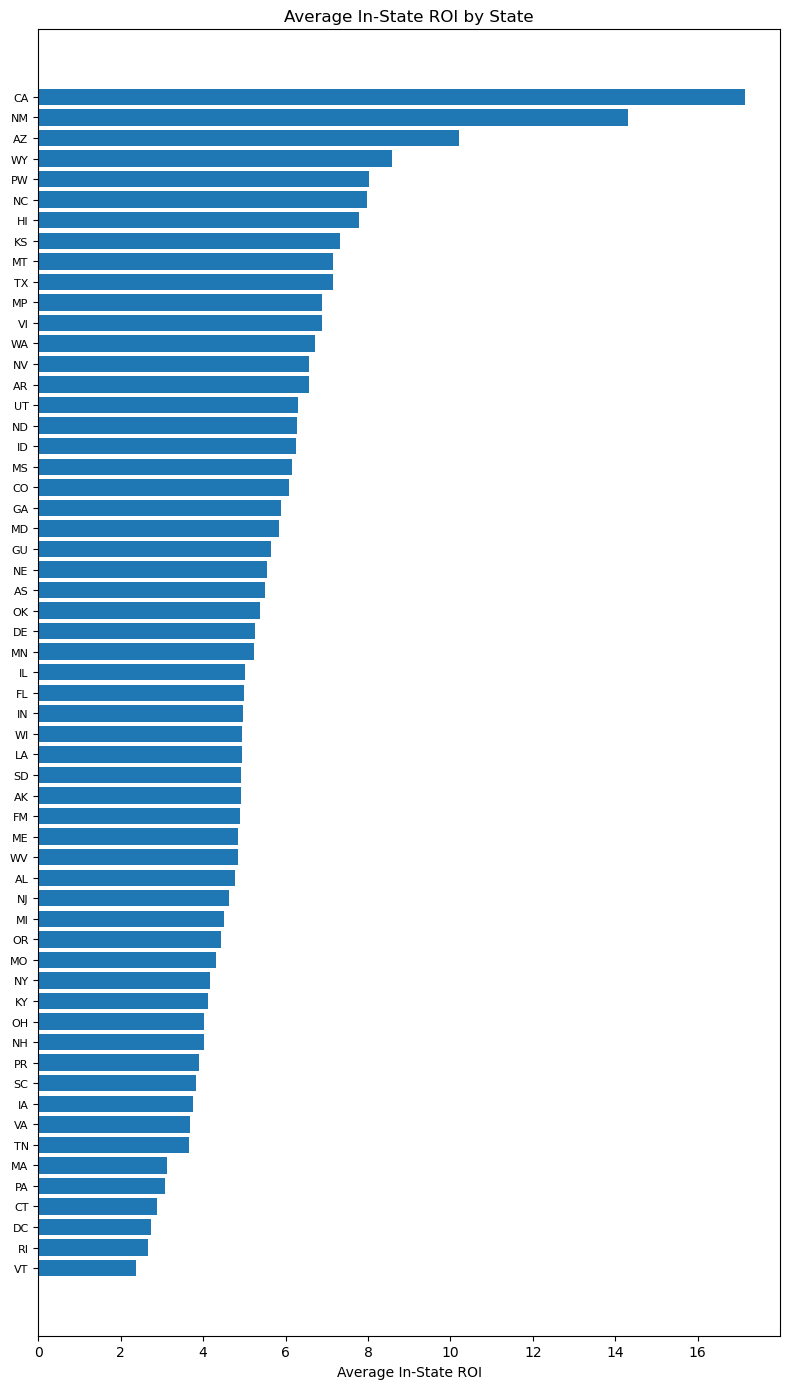

In [ ]:
df_state = df_roi.dropna(subset=["STABBR","ROI_INSTATE"])
state_roi = df_state.groupby("STABBR")["ROI_INSTATE"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,14))
plt.barh(state_roi.index, state_roi.values)
plt.gca().invert_yaxis()
plt.yticks(fontsize=8)
plt.xlabel("Average In-State ROI")
plt.title("Average In-State ROI by State")
plt.tight_layout()
plt.show()

## 6.8 STEM vs Non-STEM School Earnings

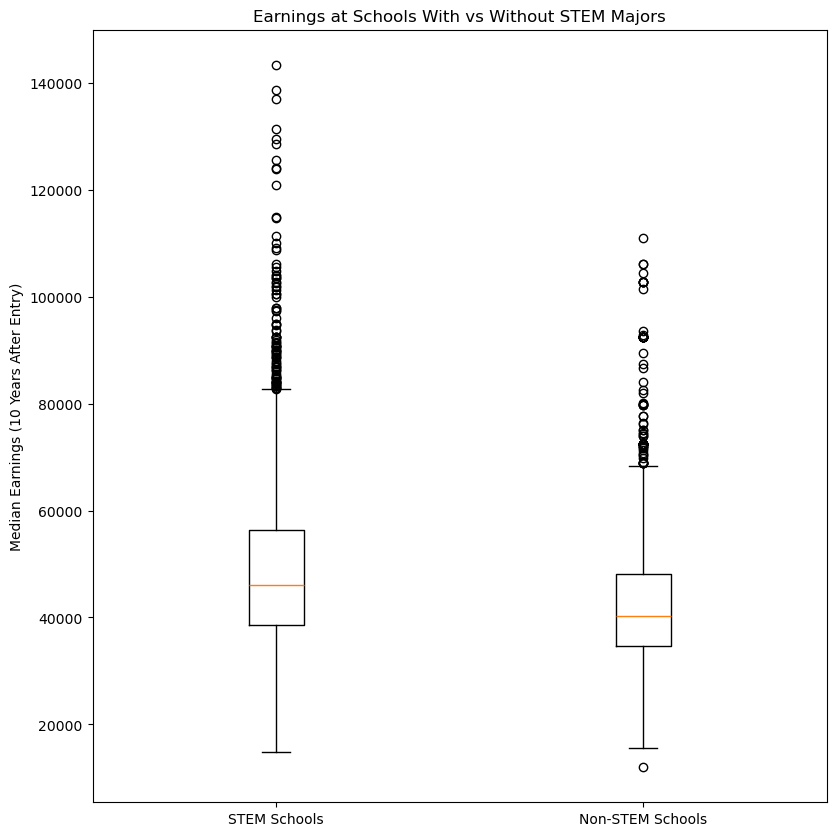

In [68]:
plt.figure(figsize=(9,9))
plt.boxplot([
    df_roi[df_roi["STEM_SCHOOL"] == True]["MD_EARN_WNE_P10"],
    df_roi[df_roi["STEM_SCHOOL"] == False]["MD_EARN_WNE_P10"]
], tick_labels=["STEM Schools","Non-STEM Schools"])

plt.ylabel("Median Earnings (10 Years After Entry)")
plt.title("Earnings at Schools With vs Without STEM Majors")
plt.tight_layout(pad=3)
plt.show()